In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

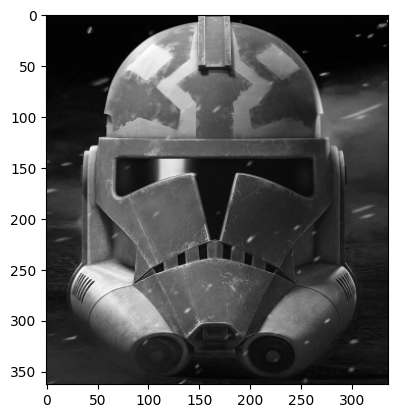

In [8]:
# считываем изображение
img_path = '/content/sample_data/pic_svd.png'
img = cv2.imread(img_path, 0)
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
None

In [9]:
U, S, V = np.linalg.svd(img, full_matrices=True, compute_uv=True) # получаем матрицы SVD разложения
print(f'img.shape: {img.shape}')
print(f'U.shape:{U.shape},S.shape:{S.shape},V.shape:{V.shape}')

img.shape: (363, 336)
U.shape:(363, 363),S.shape:(336,),V.shape:(336, 336)


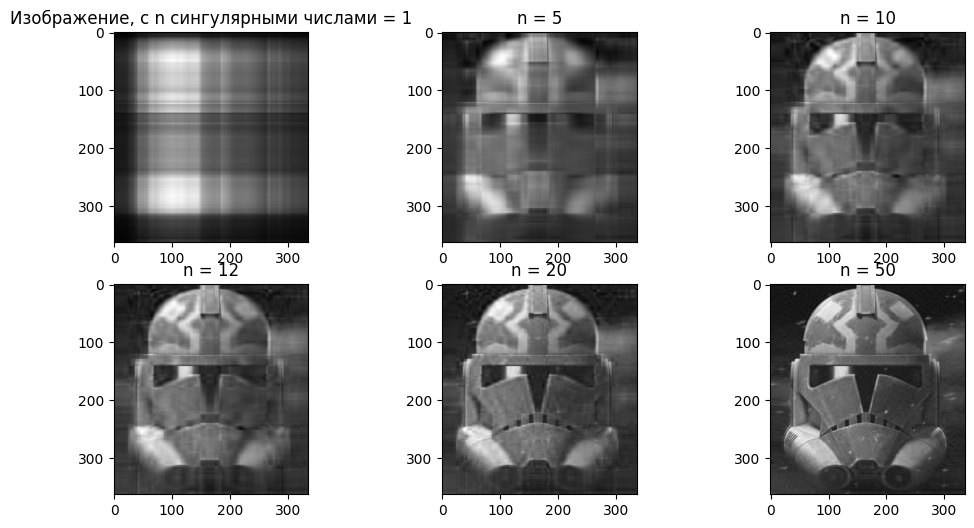

In [10]:
comps = [1, 5, 10, 12, 20, 50]  # рассматриваемые значения количества сингулярных чисел
plt.figure(figsize=(12, 6))

for i in range(len(comps)):
    low_rank_image = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :] # превращаем спектральное разложение снова в картинку, но с меньшим числом сингулярных чисел

    # выводим полученные изображения на экран
    if(i == 0):
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank_image, cmap='gray'),
        plt.title(f'Изображение, с n сингулярными числами = {comps[i]}')

    else:
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank_image, cmap='gray'),
        plt.title(f'n = {comps[i]}')